# Case Study: Cycle Sharing Scheme

##### Description:

-----------
    
    The cycle sharing scheme provides means for the people of the city to commute using a convenient, cheap, and green transportation alternative. The service has 500 bikes at 50 stations across Seattle. Each of the stations has a dock locking system (where all bikes are parked); kiosks (so customers can get a membership key or pay for a trip) and a helmet rental service. A person can choose between purchasing a membership key or short-term pass. A membership key entitles an annual membership, and the key can be obtained from a kiosk. Advantages for members include quick retrieval of bikes and unlimited 45-minute rentals. Short-term passes offer access to bikes for a 24-hour or 3-day time interval. Riders can avail and return the bikes at any of the 50 stations citywide.

------------

#### DATA Dictionary
![title](img/dictionary.png)

### Importing Packages

In [1]:
%matplotlib inline
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

#### Reading Input File

In [2]:
data = pd.read_csv("data/trip.csv")

# EDA

#### Exploring data

##### Major types of variables
![title](img/vartype.png)

In [3]:
len(data)

286857

In [4]:
data.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
trip_id              286857 non-null int64
starttime            286857 non-null object
stoptime             286857 non-null object
bikeid               286857 non-null object
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
from_station_id      286857 non-null object
to_station_id        286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 26.3+ MB


--------------------------
![title](img/vartype1.png)

In [6]:
data.describe()

,trip_id,tripduration,birthyear
count,286857.000000,286857.000000,181553.000000
mean,112431.968012,1178.295675,1979.759062
std,76565.154943,2038.458947,10.167119
min,431.000000,60.008000,1931.000000
25%,43051.000000,387.924000,1974.000000
50%,103487.000000,624.842000,1983.000000
75%,179545.000000,1118.466000,1987.000000
max,255245.000000,28794.398000,1999.000000


In [8]:
data.sort_values(by='starttime', inplace=True)
data.reset_index(drop=True, inplace=True)

In [18]:
print ('Date range of dataset: {} - {}'.format(data.loc[1, 'starttime'],data.loc[len(data)-1, 'stoptime']))

Date range of dataset: 2015-01-01 00:24:00 - 2015-09-09 10:00:00


#### Data Transformation

In [19]:
data.starttime = pd.to_datetime(data.starttime)
data.stoptime = pd.to_datetime(data.stoptime)

In [24]:
data.sort_values(by='starttime', inplace=True)
data.reset_index(drop=True, inplace=True)

In [25]:
print ('Date range of dataset: {} - {}'.format(data.loc[1, 'starttime'],data.loc[len(data)-1, 'stoptime']))

Date range of dataset: 2014-10-13 10:31:00 - 2016-09-01 00:20:00


##### Generartion in workplace
| Generation | Description |
|--------|-------------|
| The Silent Generation | Born 1928-1945 (73-90 years old) |
| Baby Boomers | Born 1946-1964 (54-72 years old) |
| Generation X | Born 1965-1980 (38-53 years old) |
| Millennials | Born 1981-1996 (22-37 years old) |
| Post-Millennials | Born 1997-Present (0-21 years old) |

###### Exercise :Create a generation column using the above criteria

In [43]:
##YourAnswershere:


#### Plotting the distribution for the category variables

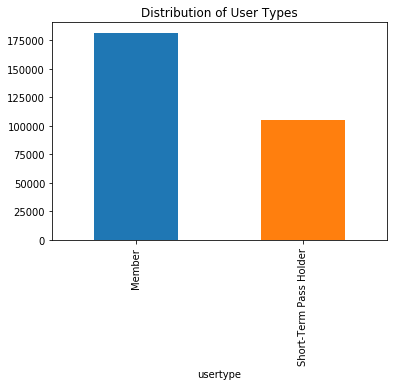

In [26]:
### Plotting the Distribution of User Types
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title = 'Distribution of User Types');

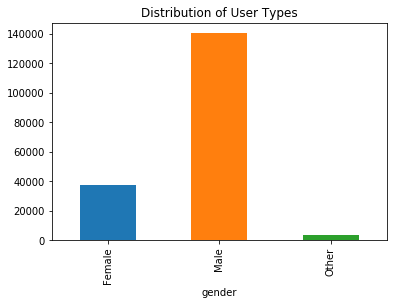

In [27]:
### Plotting the Distribution of User Gender
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of User Types');

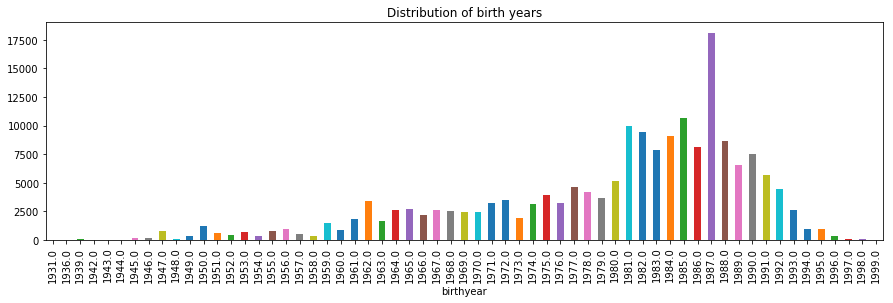

In [28]:
### Plotting the Distribution of Birth Years
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution of birth years',figsize = (15,4));

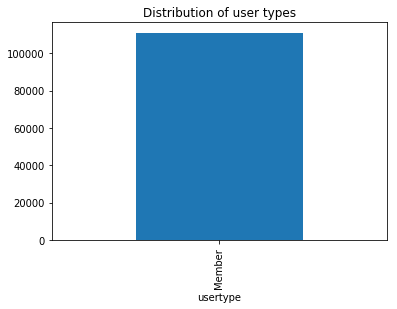

In [29]:
data_mil = data[(data['birthyear'] >= 1981) & (data['birthyear']<=1996)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title = 'Distribution of user types')

### Multivariate Analysis

In [44]:
data.gender.value_counts()

Male      140564
Female     37562
Other       3431
Name: gender, dtype: int64

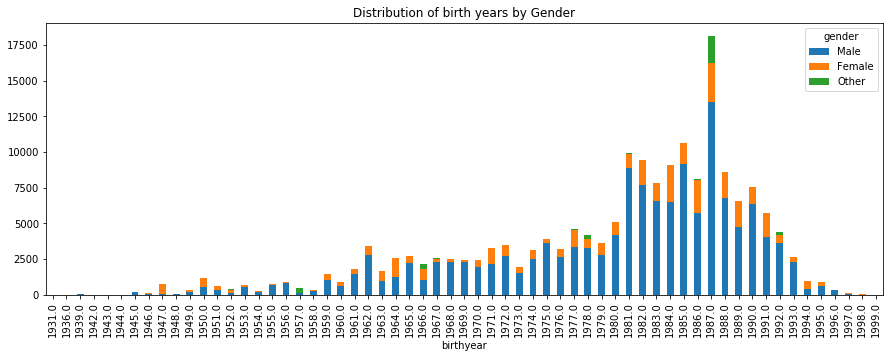

In [58]:
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title =
'Distribution of birth years by Gender', stacked=True, figsize = (15,5));

##### Plotting the Distribution of Birth Years by User Types

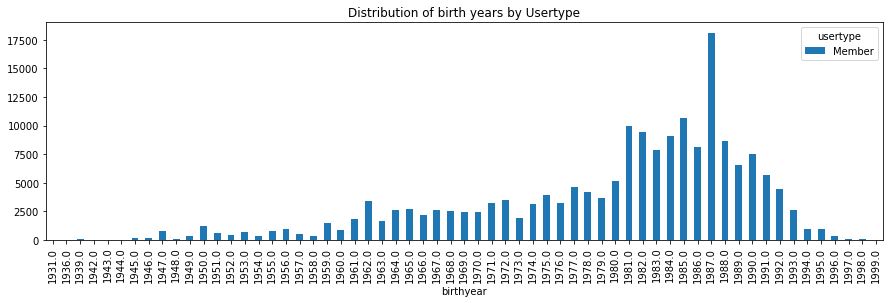

In [59]:
groupby_birthyear_user = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_user[['Member']].plot.bar(title = 'Distribution of birth years by Usertype', stacked=True, figsize = (15,4));

In [71]:
data[data['usertype']=='Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

In [72]:
data[data['usertype']=='Short-Term Pass Holder']['birthyear'].isnull

<bound method Series.isnull of 139      NaN
140      NaN
156      NaN
159      NaN
182      NaN
183      NaN
186      NaN
187      NaN
188      NaN
189      NaN
195      NaN
197      NaN
202      NaN
203      NaN
206      NaN
209      NaN
220      NaN
221      NaN
233      NaN
235      NaN
238      NaN
239      NaN
248      NaN
249      NaN
250      NaN
254      NaN
255      NaN
256      NaN
267      NaN
269      NaN
          ..
286746   NaN
286758   NaN
286759   NaN
286764   NaN
286765   NaN
286767   NaN
286788   NaN
286790   NaN
286791   NaN
286801   NaN
286804   NaN
286820   NaN
286826   NaN
286827   NaN
286828   NaN
286829   NaN
286830   NaN
286832   NaN
286833   NaN
286837   NaN
286838   NaN
286846   NaN
286849   NaN
286850   NaN
286851   NaN
286852   NaN
286853   NaN
286854   NaN
286855   NaN
286856   NaN
Name: birthyear, Length: 105300, dtype: float64>

In [83]:
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

In [85]:
data['starttime_date'] = pd.DatetimeIndex(data.starttime).date

In [82]:
data['starttime_date'] = pd.DatetimeIndex

---------------------------------------------------
## NORMAL DISTRIBUTION
![title](img/nd.png)

In [86]:
print ("Mean of trip duration:{}".format(data.tripduration.mean()))
print ("Median of trip duration:{}".format(data.tripduration.median()))
print("Mode of trip duration:{}".format(data.tripduration.mode()))
print("Mode of station originating from:{}".format(data.from_station_name.mode()))

Mean of trip duration:1178.2956753399815
Median of trip duration:624.842
Mode of trip duration:0    208.070
1    233.758
2    332.248
3    429.153
4    438.810
5    466.174
dtype: float64
Mode of station originating from:0    Pier 69 / Alaskan Way & Clay St
dtype: object


In [87]:
data.from_station_name.value_counts()

Pier 69 / Alaskan Way & Clay St                                           13054
E Pine St & 16th Ave                                                      11392
3rd Ave & Broad St                                                        10934
2nd Ave & Pine St                                                         10049
Westlake Ave & 6th Ave                                                     9994
E Harrison St & Broadway Ave E                                             9639
Cal Anderson Park / 11th Ave & Pine St                                     9468
REI / Yale Ave N & John St                                                 8382
2nd Ave & Vine St                                                          8168
15th Ave E & E Thomas St                                                   7680
Key Arena / 1st Ave N & Harrison St                                        7486
PATH / 9th Ave & Westlake Ave                                              7206
Dexter Ave N & Aloha St                 

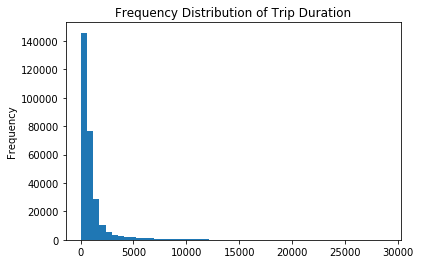

In [88]:
data.tripduration.plot.hist(bins = 50, title = 'Frequency Distribution of Trip Duration');

##### Box plot or Whisker plot

![title](img/whisker.png)

##### With Outliers

![title](img/whisker1.png)


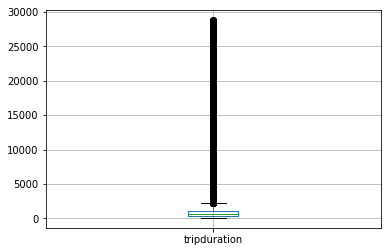

In [96]:
data.boxplot(column=['tripduration']);

#### Outliers - Detecting using IQR

![title](img/percentile.png)

In [90]:
q75, q25 = np.percentile(data.tripduration, [75,25])

In [91]:
iqr = q75 - q25

In [92]:
upper_whisker = q75 + 1.5 * iqr
lower_whisker = q25 - 1.5 * iqr

In [93]:
data.tripduration.describe()

count    286857.000000
mean       1178.295675
std        2038.458947
min          60.008000
25%         387.924000
50%         624.842000
75%        1118.466000
max       28794.398000
Name: tripduration, dtype: float64

In [97]:
def check(x, ul, ll):
    if ul>=x>=ll:
        return x

## Percentage of outliers

In [98]:
print("Percentage of Outliers in tripduration:",len(data[data.tripduration.apply(check, args = (upper_whisker, lower_whisker)).isnull()]['tripduration'])/len(data) * 100)

Percentage of Outliers in tripduration: 9.423859274830317


In [ ]:
mean_trip_duration = data[data.tripduration.apply(check, args = (upper_whisker, lower_whisker)).notnull()]['tripduration'].mean()
print (mean_trip_duration)

### Outliers Treatment

In [ ]:
def transform_tripduration(x):
    if x > upper_whisker:
        return mean_trip_duration
    return x

data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))
data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration');

#### Skewness vs. Symmetric distibution

!['title'](img/skew.png)

### Measuring Center of Measure
Mean

Median


Mode

Variance - represents variability of data points about the mean


Standard Deviation - Square root of Vairance


### Correlation

1) Pearson R


2) Kendall Rank


3) Spearman Rank

In [ ]:
data['starttime_year'] = pd.DatetimeIndex(data.starttime).year

In [ ]:
data['age'] = data['starttime_year'] - data['birthyear']

In [ ]:
data.age.plot.hist(bins=100)

In [ ]:
data = data.dropna()
seaborn.pairplot(data, vars=['age', 'tripduration'], kind='reg')
plt.show()

##### Correlation Directions

---------------------

![title](img/corr1.png)

-------------------
Reference table

![title](img/corr2.png)

In [ ]:
correlations = data[['tripduration','age']].corr(method='pearson')
print(correlations)

#### Central Limit Theorem-VIsual Proof

![title](img/clt1.jpeg)

In [ ]:
daily_tickets = list(data.groupby('starttime_date').size())
sample_tickets = []
checkpoints = [1, 10, 100, 300, 500, 700, 900, 1000]

plot_count = 1
random.shuffle(daily_tickets)
plt.figure(figsize=(15,7))
binrange=np.array(np.linspace(0,500,101))

for i in range(1000):
    if daily_tickets:
        sample_tickets.append(daily_tickets.pop())

        if i+1 in checkpoints or not daily_tickets:
            plt.subplot(2,3,plot_count)
            plt.hist(sample_tickets, binrange)
            plt.title('n=%d' % (i+1),fontsize=15)
            plot_count+=1
            
        if not daily_tickets:
            break

### Log Transformation to reduce skewness

In [ ]:
plt.hist(data.age);

In [ ]:
plt.hist(np.log10(data.age));